# Web Scraper con Python

### Tema: Oficina

### Productos: Multifuncional, mochila, silla


### Sitios: Office Depot, Lumen, Oficce Max

Importamos las paquerias necesarias

In [45]:
import pandas as pd
import pandasql as ps
import time 
import numpy as np
import re
from selenium import webdriver
import matplotlib.pyplot as plt

Creamos un data frame para cada uno de los sitios a consultar

In [46]:
aux = pd.DataFrame()

aux.to_excel("df_office_depot.xlsx",index=False)

In [47]:
aux2 = pd.DataFrame()

aux2.to_excel("df_lumen.xlsx",index=False)

In [48]:
aux3 = pd.DataFrame()

aux3.to_excel("df_office_max.xlsx",index=False)

Buscador de Oficce Depot

In [49]:
def Buscador_Precios_Selenium_Office_Depot(producto,path):
    
    ### Ingresamos a la pagina web 
    driver = webdriver.Chrome(path)
    url = "https://www.officedepot.com.mx/officedepot/en/search/?text="+producto
    driver.get(url)
    
    ### Accedemos a los elementos que contienen los datos que queremos de la pagina web 
    productos = driver.find_elements_by_class_name("product-item")
    
    ### Accedemos a las urls almacenadas en la variable productos
    lista_urls=list()

    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_class_name("product-description.heigh-grid").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    
    ### Accedemos a los nombres de los productos
    lista_nombres=list()
    
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_element_by_tag_name("h2").text)
        except:
            lista_nombres.append(np.nan)
    
    ### Accedemos a los precios base y promo de los productos 
    lista_precios=list()
    lista_promos=list()

    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_element_by_class_name("prices-container").text.split("\n")[0])
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_element_by_class_name("prices-container").text.split("\n")[1])
        except:
            lista_promos.append(np.nan)
    
    ### Creamos el dataframe
    df_office_depot =pd.DataFrame({"Nombre":lista_nombres,"Url":lista_urls,"Precio_promocion":lista_promos,"Precio_original":lista_precios})
    df_office_depot["Autoservicio"]="Office Depot"
    df_office_depot["Marca"]= producto
    df_office_depot["Fecha"]= time.strftime("%d/%m/%y")
    
    ### Reordenando el dataframe
    df_office_depot = df_office_depot[["Fecha","Autoservicio","Marca","Nombre","Url","Precio_promocion","Precio_original"]]
    df_office_depot = df_office_depot[df_office_depot['Nombre'].astype(str).str.contains(r'\b{}\b'.format(producto), regex=True, case=False)]
    df_office_depot = df_office_depot.reset_index(drop=True)
    
    ### Pasando los datos
    datos_webscraper = pd.read_excel("df_office_depot.xlsx")
    datos_webscraper = pd.concat([datos_webscraper,df_office_depot],axis=0)
    datos_webscraper.to_excel("df_office_depot.xlsx",index=False)
    
    driver.quit()
    
    return df_office_depot

Buscador de Lumen

In [54]:
def Buscador_Precios_Selenium_Lumen(producto,path):
    
    ### Ingresamos a la pagina web 
    driver = webdriver.Chrome(path)
    url = "https://lumen.com.mx/search?q="+producto
    driver.get(url)
    
    ### Accedemos a los elementos que contienen los datos que queremos de la pagina web 
    productos = driver.find_elements_by_class_name("product-item")
    
    ### Accedemos a las urls almacenadas en la variable productos
    lista_urls=list()

    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    
    ### Accedemos a los nombres de los productos
    lista_nombres=list()

    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_element_by_class_name("product-title").text)
        except:
            lista_nombres.append(np.nan)

    ### Accedemos a los precios base y promo de los productos 
    lista_precios=list()
    lista_promos=list()

    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_element_by_class_name("prices").text.split("\n")[2].split(" $")[0])
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_element_by_class_name("price.discount-price").text)
        except:
            lista_promos.append(np.nan)
  
    
    ### Creamos el dataframe
    df_lumen =pd.DataFrame({"Nombre":lista_nombres,"Url":lista_urls,"Precio_promocion":lista_promos,"Precio_original":lista_precios})
    df_lumen["Autoservicio"]="Lumen"
    df_lumen["Marca"]= producto
    df_lumen["Fecha"]= time.strftime("%d/%m/%y")
    
    ### Reordenando el dataframe
    df_lumen = df_lumen[["Fecha","Autoservicio","Marca","Nombre","Url","Precio_promocion","Precio_original"]]
    df_lumen = df_lumen[df_lumen['Nombre'].astype(str).str.contains(r'\b{}\b'.format(producto), regex=True, case=False)]
    df_lumen = df_lumen.reset_index(drop=True)
    
    ###Pasando los datos
    datos_webscraper = pd.read_excel("df_lumen.xlsx")
    datos_webscraper = pd.concat([datos_webscraper,df_lumen],axis=0)
    datos_webscraper.to_excel("df_lumen.xlsx",index=False)

    driver.quit()
    
    return df_lumen
    

Buscador de Oficce Max

In [51]:
def Buscador_Precios_Selenium_Office_Max(producto,path):
    
    ### Ingresamos a la pagina web 
    driver = webdriver.Chrome(path)
    url = "https://www.officemax.com.mx/"+producto
    driver.get(url)
    
    ####### Accedemos a los elementos que contienen los datos que queremos de la pagina web 
    productos = driver.find_elements_by_class_name("product-item")
    
    ### accedemos a las urls almacenadas en la variable productos
    lista_urls=list()

    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    
    ### Accedemos a los nombres de los productos
    lista_nombres=list()

    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_element_by_tag_name("h2").text)
        except:
            lista_nombres.append(np.nan)
    
    ### Accedemos a los precios base y promo de los productos 
    lista_precios=list()
    lista_promos=list()

    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_element_by_class_name("product-item__price").text.split("\n")[0])
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_element_by_class_name("product-item__price").text.split("\n")[1])
        except:
            lista_promos.append(np.nan)
    
    ### Creamos el dataframe
    df_office_max =pd.DataFrame({"Nombre":lista_nombres,"Url":lista_urls,"Precio_promocion":lista_promos,"Precio_original":lista_precios})
    df_office_max["Autoservicio"]="Office Max"
    df_office_max["Marca"]= producto
    df_office_max["Fecha"]= time.strftime("%d/%m/%y")
    
    ### Reordenando el dataframe
    df_office_max = df_office_max[["Fecha","Autoservicio","Marca","Nombre","Url","Precio_promocion","Precio_original"]]
    df_office_max  = df_office_max [df_office_max ['Nombre'].astype(str).str.contains(r'\b{}\b'.format(producto), regex=True, case=False)]
    df_office_max = df_office_max.reset_index(drop=True)
    
    ### Pasando los datos
    datos_webscraper = pd.read_excel("df_office_max.xlsx")
    datos_webscraper = pd.concat([datos_webscraper,df_office_max],axis=0)
    datos_webscraper.to_excel("df_office_max.xlsx",index=False)

    driver.quit()
    
    return df_office_max

Ejecutamos los buscadores con nuestros 3 productos

In [55]:
mypath = "C:\webdriver\chromedriver.exe"

In [56]:
for productos in ["multifuncional","mochila","silla"]:
    Buscador_Precios_Selenium_Office_Depot(productos,mypath)
    Buscador_Precios_Selenium_Lumen(productos,mypath)
    Buscador_Precios_Selenium_Office_Max(productos,mypath)

C:\Users\LICENC~1\AppData\Local\Temp/ipykernel_9212/2882398675.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)
C:\Users\LICENC~1\AppData\Local\Temp/ipykernel_9212/2882398675.py:9: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos = driver.find_elements_by_class_name("product-item")


Leemos los data frames

In [57]:
df_office_depot = pd.read_excel("df_office_depot.xlsx")
df_lumen = pd.read_excel("df_lumen.xlsx")
df_office_max = pd.read_excel("df_office_max.xlsx")

Mostrando cada data frame

In [58]:
df_office_depot

,Fecha,Autoservicio,Marca,Nombre,Url,Precio_promocion,Precio_original
0,27/01/22,Office Depot,multifuncional,Impresora Multifuncional Canon Pixma G3160 / T...,https://www.officedepot.com.mx/officedepot/en/...,NaN,"$4,699.00"
1,27/01/22,Office Depot,multifuncional,Impresora Multifuncional Epson Ecotank L3210 /...,https://www.officedepot.com.mx/officedepot/en/...,"$4,699.00","$4,999.00"
2,27/01/22,Office Depot,multifuncional,Impresora Multifuncional Hp Smart Tank 500 / T...,https://www.officedepot.com.mx/officedepot/en/...,NaN,"$4,799.00"
3,27/01/22,Office Depot,multifuncional,Impresora Multifuncional Brother DCPB7535DW / ...,https://www.officedepot.com.mx/officedepot/en/...,NaN,"$6,519.00"
4,27/01/22,Office Depot,multifuncional,Impresora Multifuncional Brother DCP-T720DW / ...,https://www.officedepot.com.mx/officedepot/en/...,NaN,"$5,829.00"
...,...,...,...,...,...,...,...
86,27/01/22,Office Depot,silla,Silla de Oficina Coscorp Indonesia / Tela / Negro,https://www.officedepot.com.mx/officedepot/en/...,NaN,"$1,899.00"
87,27/01/22,Office Depot,silla,Silla de Oficina Coscorp Gales / Tela / Negro,https://www.officedepot.com.mx/officedepot/en/...,NaN,"$1,599.00"
88,27/01/22,Office Depot,silla,Silla de Oficina Red Top Panamá / Tela / Negro,https://www.officedepot.com.mx/officedepot/en/...,NaN,"$1,949.00"
89,27/01/22,Office Depot,silla,Silla Plegable Coscorp Belice / Acero / Negro,https://www.officedepot.com.mx/officedepot/en/...,NaN,$399.00


In [59]:
df_lumen

,Fecha,Autoservicio,Marca,Nombre,Url,Precio_promocion,Precio_original
0,27/01/22,Lumen,multifuncional,IMPRESORA MULTIFUNCIONAL HP NEVERSTOP LASER ...,https://lumen.com.mx/impresora-multifuncional-...,NaN,"$7,499.00 MXN"
1,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET CANON PIXMA G610 PHOTO ...,https://lumen.com.mx/multifuncional-inkjet-can...,"$5,889.00 MXN","$6,199.00 MXN"
2,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET HP ST 515 USB/WIFI PC/ ...,https://lumen.com.mx/multifuncional-inkjet-hp-...,NaN,"$5,799.00 MXN"
3,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET CANON PIXMA G4110,https://lumen.com.mx/multifuncional-inkjet-can...,NaN,"$5,199.00 MXN"
4,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL CANON PIXMA G6010 TANK,https://lumen.com.mx/multifuncional-canon-pixm...,"$4,999.00 MXN","$5,999.00 MXN"
...,...,...,...,...,...,...,...
66,27/01/22,Lumen,silla,SILLA GAMER DOWINX PLUS 6668 AZUL,https://lumen.com.mx/silla-gamer-dowinx-plus-6...,NaN,"$9,499.00 MXN"
67,27/01/22,Lumen,silla,SILLA GAMER DOWINX PLUS 6668 NEGRO,https://lumen.com.mx/silla-gamer-dowinx-plus-6...,NaN,"$9,499.00 MXN"
68,27/01/22,Lumen,silla,SILLA GAMER DXRACER GC-P132-N-F2-158 NEGRO,https://lumen.com.mx/silla-gamer-dxracer-gc-p1...,NaN,"$7,999.00 MXN"
69,27/01/22,Lumen,silla,SILLA DXRACER PC GAMING BLANCO,https://lumen.com.mx/silla-dxracer-pc-gaming-b...,NaN,"$7,499.00 MXN"


In [60]:
df_office_max

,Fecha,Autoservicio,Marca,Nombre,Url,Precio_promocion,Precio_original
0,27/01/22,Office Max,multifuncional,Multifuncional Brother J6530DW,https://www.officemax.com.mx/multifuncional-br...,NaN,"$6,869.00"
1,27/01/22,Office Max,multifuncional,Multifuncional Canon MG2510 Pixma,https://www.officemax.com.mx/multifuncional-ca...,NaN,"$1,269.00"
2,27/01/22,Office Max,multifuncional,"Multifuncional Brother DCPT520W, InkBenefit Ta...",https://www.officemax.com.mx/multifuncional-br...,NaN,"$4,679.00"
3,27/01/22,Office Max,multifuncional,"Multifuncional Epson L3110 Eco Tank, Tinta a c...",https://www.officemax.com.mx/multifuncional-ep...,"$4,399.00","$4,749.00"
4,27/01/22,Office Max,multifuncional,Multifuncional HP Smart Tank 750 Tinta Continu...,https://www.officemax.com.mx/todo-en-uno-hp-75...,NaN,"$8,499.00"
5,27/01/22,Office Max,multifuncional,Multifuncional Epson EcoTank L3251 Color Inyec...,https://www.officemax.com.mx/multifuncional-ep...,NaN,"$5,741.00"
6,27/01/22,Office Max,multifuncional,"Multifuncional HP Neverstop 1200w, Tanque de T...",https://www.officemax.com.mx/multifuncional-hp...,NaN,"$6,499.00"
7,27/01/22,Office Max,multifuncional,"Multifuncional HP Smart Tank 500, Tanque de Ti...",https://www.officemax.com.mx/multifuncional-hp...,NaN,"$4,499.00"
8,27/01/22,Office Max,multifuncional,Multifuncional Brother MFC-T920DW InkBenefit D...,https://www.officemax.com.mx/multifuncional-br...,NaN,"$7,799.00"
9,27/01/22,Office Max,multifuncional,"Multifuncional HP Smart Tank 515, Tanque de Ti...",https://www.officemax.com.mx/multifuncional-hp...,NaN,"$5,499.00"


Creamos un data frame global en donde tengamos las consultas de los 3 sitios

In [61]:
df_global = pd.concat([df_lumen,df_office_depot,df_office_max])

In [62]:
df_global

,Fecha,Autoservicio,Marca,Nombre,Url,Precio_promocion,Precio_original
0,27/01/22,Lumen,multifuncional,IMPRESORA MULTIFUNCIONAL HP NEVERSTOP LASER ...,https://lumen.com.mx/impresora-multifuncional-...,NaN,"$7,499.00 MXN"
1,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET CANON PIXMA G610 PHOTO ...,https://lumen.com.mx/multifuncional-inkjet-can...,"$5,889.00 MXN","$6,199.00 MXN"
2,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET HP ST 515 USB/WIFI PC/ ...,https://lumen.com.mx/multifuncional-inkjet-hp-...,NaN,"$5,799.00 MXN"
3,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET CANON PIXMA G4110,https://lumen.com.mx/multifuncional-inkjet-can...,NaN,"$5,199.00 MXN"
4,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL CANON PIXMA G6010 TANK,https://lumen.com.mx/multifuncional-canon-pixm...,"$4,999.00 MXN","$5,999.00 MXN"
...,...,...,...,...,...,...,...
23,27/01/22,Office Max,silla,Silla Ejecutiva Praga,https://www.officemax.com.mx/silla-ejecutiva-p...,NaN,"$3,999.00"
24,27/01/22,Office Max,silla,Silla Ejecutiva Mumbai Negro,https://www.officemax.com.mx/silla-ejecutiva-m...,NaN,"$2,449.00"
25,27/01/22,Office Max,silla,Silla Ejecutiva Space Negro,https://www.officemax.com.mx/silla-ejecutiva-s...,NaN,"$3,999.00"
26,27/01/22,Office Max,silla,Silla Ejecutiva Silves café,https://www.officemax.com.mx/silla-ejecutiva-s...,NaN,"$3,599.00"


Reordenamos los indices del data frame global

In [63]:
df_global = df_global.reset_index(drop=True)

In [64]:
df_global

,Fecha,Autoservicio,Marca,Nombre,Url,Precio_promocion,Precio_original
0,27/01/22,Lumen,multifuncional,IMPRESORA MULTIFUNCIONAL HP NEVERSTOP LASER ...,https://lumen.com.mx/impresora-multifuncional-...,NaN,"$7,499.00 MXN"
1,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET CANON PIXMA G610 PHOTO ...,https://lumen.com.mx/multifuncional-inkjet-can...,"$5,889.00 MXN","$6,199.00 MXN"
2,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET HP ST 515 USB/WIFI PC/ ...,https://lumen.com.mx/multifuncional-inkjet-hp-...,NaN,"$5,799.00 MXN"
3,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET CANON PIXMA G4110,https://lumen.com.mx/multifuncional-inkjet-can...,NaN,"$5,199.00 MXN"
4,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL CANON PIXMA G6010 TANK,https://lumen.com.mx/multifuncional-canon-pixm...,"$4,999.00 MXN","$5,999.00 MXN"
...,...,...,...,...,...,...,...
185,27/01/22,Office Max,silla,Silla Ejecutiva Praga,https://www.officemax.com.mx/silla-ejecutiva-p...,NaN,"$3,999.00"
186,27/01/22,Office Max,silla,Silla Ejecutiva Mumbai Negro,https://www.officemax.com.mx/silla-ejecutiva-m...,NaN,"$2,449.00"
187,27/01/22,Office Max,silla,Silla Ejecutiva Space Negro,https://www.officemax.com.mx/silla-ejecutiva-s...,NaN,"$3,999.00"
188,27/01/22,Office Max,silla,Silla Ejecutiva Silves café,https://www.officemax.com.mx/silla-ejecutiva-s...,NaN,"$3,599.00"


Convertiremos los precios a datos del tipo flotante para poder trabajar con ellos

In [67]:
def precios_floats(datos):

    #### Eliminamos el signo de pesos de ambas columnas
    
    for i in range(len(datos["Precio_promocion"])):
        try:
            datos["Precio_promocion"].iloc[i]=datos["Precio_promocion"].iloc[i].strip("$").strip(" MXN")
        except:
            pass
        
    for i in range(len(datos["Precio_original"])):
        try:
            datos["Precio_original"].iloc[i]=datos["Precio_original"].iloc[i].strip("$").strip(" MXN")
        except:
            pass
        
    ### Quitamos la separacion de comas para miles
    
    datos["Precio_promocion"]=datos["Precio_promocion"].replace(",","",regex=True)
    datos["Precio_original"]=datos["Precio_original"].replace(",","",regex=True)
    
    ### Convertimos los precios a numericos    
    datos['Precio_promocion'] = pd.to_numeric(datos['Precio_promocion'], errors='coerce')
    datos['Precio_original'] = pd.to_numeric(datos['Precio_original'], errors='coerce')
    
    datos.to_excel("df_limpio.xlsx",index=False)
        
    ### Visualizamos los tipos de datos
    print(datos.dtypes)
    
    return datos

Aplicamos la función al data frame global

In [68]:
precios_floats(df_global)

Fecha                object
Autoservicio         object
Marca                object
Nombre               object
Url                  object
Precio_promocion    float64
Precio_original     float64
dtype: object


,Fecha,Autoservicio,Marca,Nombre,Url,Precio_promocion,Precio_original
0,27/01/22,Lumen,multifuncional,IMPRESORA MULTIFUNCIONAL HP NEVERSTOP LASER ...,https://lumen.com.mx/impresora-multifuncional-...,NaN,7499.0
1,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET CANON PIXMA G610 PHOTO ...,https://lumen.com.mx/multifuncional-inkjet-can...,5889.0,6199.0
2,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET HP ST 515 USB/WIFI PC/ ...,https://lumen.com.mx/multifuncional-inkjet-hp-...,NaN,5799.0
3,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET CANON PIXMA G4110,https://lumen.com.mx/multifuncional-inkjet-can...,NaN,5199.0
4,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL CANON PIXMA G6010 TANK,https://lumen.com.mx/multifuncional-canon-pixm...,4999.0,5999.0
...,...,...,...,...,...,...,...
185,27/01/22,Office Max,silla,Silla Ejecutiva Praga,https://www.officemax.com.mx/silla-ejecutiva-p...,NaN,3999.0
186,27/01/22,Office Max,silla,Silla Ejecutiva Mumbai Negro,https://www.officemax.com.mx/silla-ejecutiva-m...,NaN,2449.0
187,27/01/22,Office Max,silla,Silla Ejecutiva Space Negro,https://www.officemax.com.mx/silla-ejecutiva-s...,NaN,3999.0
188,27/01/22,Office Max,silla,Silla Ejecutiva Silves café,https://www.officemax.com.mx/silla-ejecutiva-s...,NaN,3599.0


In [69]:
df_global = pd.read_excel("df_limpio.xlsx")

In [70]:
df_global

,Fecha,Autoservicio,Marca,Nombre,Url,Precio_promocion,Precio_original
0,27/01/22,Lumen,multifuncional,IMPRESORA MULTIFUNCIONAL HP NEVERSTOP LASER ...,https://lumen.com.mx/impresora-multifuncional-...,NaN,7499.0
1,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET CANON PIXMA G610 PHOTO ...,https://lumen.com.mx/multifuncional-inkjet-can...,5889.0,6199.0
2,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET HP ST 515 USB/WIFI PC/ ...,https://lumen.com.mx/multifuncional-inkjet-hp-...,NaN,5799.0
3,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET CANON PIXMA G4110,https://lumen.com.mx/multifuncional-inkjet-can...,NaN,5199.0
4,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL CANON PIXMA G6010 TANK,https://lumen.com.mx/multifuncional-canon-pixm...,4999.0,5999.0
...,...,...,...,...,...,...,...
185,27/01/22,Office Max,silla,Silla Ejecutiva Praga,https://www.officemax.com.mx/silla-ejecutiva-p...,NaN,3999.0
186,27/01/22,Office Max,silla,Silla Ejecutiva Mumbai Negro,https://www.officemax.com.mx/silla-ejecutiva-m...,NaN,2449.0
187,27/01/22,Office Max,silla,Silla Ejecutiva Space Negro,https://www.officemax.com.mx/silla-ejecutiva-s...,NaN,3999.0
188,27/01/22,Office Max,silla,Silla Ejecutiva Silves café,https://www.officemax.com.mx/silla-ejecutiva-s...,NaN,3599.0


# Consultas

1. Cantidad de productos por cada tipo de producto

In [99]:
ps.sqldf("select Marca,count(Marca) as Cantidad  from df_global group by Marca")

,Marca,Cantidad
0,mochila,50
1,multifuncional,80
2,silla,60


2. Cantidad de productos por cada Autoservicio

In [100]:
ps.sqldf("select Autoservicio,count(Autoservicio) as Cantidad  from df_global group by Autoservicio")

,Autoservicio,Cantidad
0,Lumen,71
1,Office Depot,91
2,Office Max,28


3. Todos los productos con promoción

In [101]:
ps.sqldf("select * from df_global where(Precio_promocion is not null)")

,Fecha,Autoservicio,Marca,Nombre,Url,Precio_promocion,Precio_original
0,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET CANON PIXMA G610 PHOTO ...,https://lumen.com.mx/multifuncional-inkjet-can...,5889.00,6199.0
1,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL CANON PIXMA G6010 TANK,https://lumen.com.mx/multifuncional-canon-pixm...,4999.00,5999.0
2,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET CANON MT G3160,https://lumen.com.mx/multifuncional-inkjet-can...,4499.00,4699.0
3,27/01/22,Lumen,mochila,MOCHILA SAMSONITE JULIETTE PORTA LAPTOP GRIS,https://lumen.com.mx/mochila-samsonite-juliett...,881.30,1259.0
4,27/01/22,Lumen,mochila,MOCHILA GABOL DERBY,https://lumen.com.mx/mochila-gabol-derby-marca...,749.40,1249.0
5,27/01/22,Lumen,mochila,MOCHILA TOTTO PARA TABLET O PC CAMBRIDGE P78,https://lumen.com.mx/mochila-totto-para-tablet...,839.30,1199.0
6,27/01/22,Lumen,mochila,MOCHILA TOTTO CAMBRIDGE Z3I,https://lumen.com.mx/mochila-totto-cambridge-z...,839.30,1199.0
7,27/01/22,Lumen,mochila,MOCHILA TOTTO PARA TABLET O PC CAMBRIDGE M63,https://lumen.com.mx/mochila-totto-para-tablet...,839.30,1199.0
8,27/01/22,Office Depot,multifuncional,Impresora Multifuncional Epson Ecotank L3210 /...,https://www.officedepot.com.mx/officedepot/en/...,4699.00,4999.0
9,27/01/22,Office Depot,multifuncional,Impresora Multifuncional Epson Ecotank L3251 /...,https://www.officedepot.com.mx/officedepot/en/...,5499.00,5799.0


4. Promedio de precios por Autoservicio

In [84]:
ps.sqldf("select Autoservicio,avg(Precio_original) as Promedio_precios from df_global group by Autoservicio")

,Autoservicio,Promedio_precios
0,Lumen,5144.661972
1,Office Depot,3606.349438
2,Office Max,3538.178571


5. Productos más costosos por Autoservicio

In [91]:
ps.sqldf("select Autoservicio,Marca,Nombre,Precio_promocion,max(Precio_original) as Max_precio from df_global group by Autoservicio")

,Autoservicio,Marca,Nombre,Precio_promocion,Max_precio
0,Lumen,silla,SILLA GAMER DOWINX EXEC PRO 6689 GRIS,None,11499.0
1,Office Depot,multifuncional,Impresora Multifuncional Hp Smart Tank 750 / T...,None,8499.0
2,Office Max,multifuncional,Multifuncional HP Smart Tank 750 Tinta Continu...,None,8499.0


6. Productos más costosos por Marca o Tipo de producto

In [102]:
ps.sqldf("select Autoservicio,Marca,Nombre,Precio_promocion,max(Precio_original) as Max_precio from df_global group by Marca")

,Autoservicio,Marca,Nombre,Precio_promocion,Max_precio
0,Lumen,mochila,MOCHILA MOLESKINE METRO GRANDE NEGRA,None,3299.0
1,Lumen,multifuncional,MULTIFUNCIONAL LASER A COLOR HP LP / Mod. M ...,None,8499.0
2,Lumen,silla,SILLA GAMER DOWINX EXEC PRO 6689 GRIS,None,11499.0


7. Productos más baratos por Autoservicio

In [95]:
ps.sqldf("select Autoservicio,Marca,Nombre,Precio_promocion,min(Precio_original) as Min_precio from df_global group by Autoservicio")

,Autoservicio,Marca,Nombre,Precio_promocion,Min_precio
0,Lumen,multifuncional,CORREA VELCRO MULTIFUNCIONAL CON ASAS 80112N ...,None,318.0
1,Office Depot,mochila,MOCHILA ESCOLAR BASIC CITY BP146 (ROJO),None,145.0
2,Office Max,mochila,Mochila de Silicón Llamas,None,29.0


8. Productos con precios entre 2,000 y 3,000 pesos

In [106]:
ps.sqldf("select * from df_global where(Precio_original > 2000 and Precio_original < 3000 )")

,Fecha,Autoservicio,Marca,Nombre,Url,Precio_promocion,Precio_original
0,27/01/22,Lumen,multifuncional,MULTIFUNCIONAL INKJET HP DJPIA 6475 ADF/FAX ...,https://lumen.com.mx/multifuncional-inkjet-hp-...,NaN,2999.0
1,27/01/22,Lumen,mochila,MOCHILA MOLESKINE DEVICE METRO GRANDE ROJA,https://lumen.com.mx/mochila-moleskine-device-...,NaN,2799.0
2,27/01/22,Lumen,mochila,MOCHILA MOLESKINE DEVICE METRO GRANDE NEGRA,https://lumen.com.mx/mochila-moleskine-device-...,NaN,2799.0
3,27/01/22,Lumen,mochila,MOCHILA MOLESKINE DEVICE METRO GRANDE AZUL Z ...,https://lumen.com.mx/mochila-moleskine-device-...,NaN,2799.0
4,27/01/22,Lumen,mochila,MOCHILA MOLESKINE DEVICE METRO GRANDE VERDE,https://lumen.com.mx/mochila-moleskine-device-...,NaN,2799.0
5,27/01/22,Lumen,mochila,MOCHILA MOLESKINE DEVICE METRO GRANDE GRIS,https://lumen.com.mx/mochila-moleskine-device-...,NaN,2799.0
6,27/01/22,Lumen,mochila,MOCHILA CON RUEDAS TOTTO PASTEL GALAXY L 9M4,https://lumen.com.mx/mochila-con-ruedas-totto-...,NaN,2099.0
7,27/01/22,Lumen,silla,SILLA ECO MALLA EJECUTIVA RESPALDO ALTO,https://lumen.com.mx/silla-eco-malla-ejecutiva...,NaN,2899.0
8,27/01/22,Lumen,silla,SILLA OHS-10 SECRETARIAL ERGONÓMICA RESPALDO ...,https://lumen.com.mx/silla-ohs-10-secretarial-...,NaN,2699.0
9,27/01/22,Office Depot,multifuncional,Impresora Multifuncional Hp 135A / Láser / Bla...,https://www.officedepot.com.mx/officedepot/en/...,NaN,2999.0


# Gráficas


1. Gráfico que compara el promedio del total de los productos con sus precios por cada sitio.

Nos da una idea de que sitio tiene en general los precios mas caros.

Text(0.5, 1.0, 'Promedio de precios')

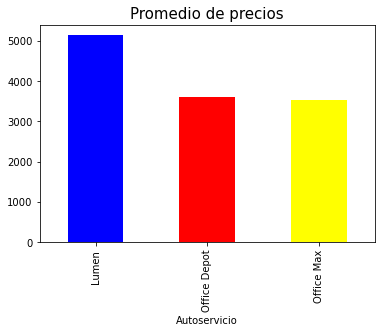

In [108]:
df_global.groupby("Autoservicio")["Precio_original"].mean().plot(kind="bar", color=["blue","red","yellow"],align='center')
plt.title("Promedio de precios",fontsize=15)

2. Gráfico que muestra la comparitiva del producto mas costoso en cada sitio

Text(0.5, 1.0, 'Máximo Precio')

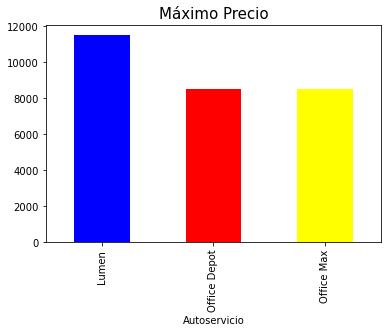

In [112]:
df_global.groupby("Autoservicio")["Precio_original"].max().plot(kind="bar", color=["blue","red","yellow"],align='center')
plt.title("Máximo Precio",fontsize=15)

3. Gráfico que muestra la comparitiva del producto menos costoso en cada sitio

Text(0.5, 1.0, 'Mínimo Precio')

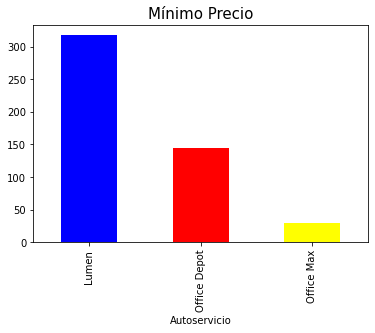

In [121]:
df_global.groupby("Autoservicio")["Precio_original"].min().plot(kind="bar", color=["blue","red","yellow"],align='center')
plt.title("Mínimo Precio",fontsize=15)

4. Gráfico que compara cual de los sitios tiene más descuentos por los productos consultados

Text(0.5, 0, 'Cantidad de productos con descuento')

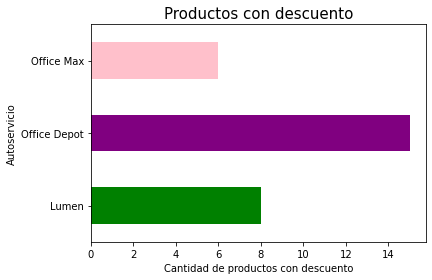

In [117]:
df_global.groupby("Autoservicio")["Precio_promocion"].count().plot(kind="barh", color=["green","purple","pink"],align='center')
plt.title("Productos con descuento",fontsize=15)
plt.xlabel("Cantidad de productos con descuento")